In [132]:
from mpmath import *
mp.dps = 40
mp.pretty = True
import numpy as np

In [112]:
gammainc(2+3j, 4, 10)
mp.dps = 100

In [113]:
P = int(4)
K = 3
Sigma = np.identity(P, dtype=mpf)
delta = np.zeros((P,P), dtype=mpf)
x = 6 * np.ones((P,), dtype=mpf)

In [114]:
T = 9
Idx = mp.inverse(np.identity(P, dtype=mpf))
deltaR = Idx - Idx
sp = np.ones((P,1))
v = mpf(0.5)
SigmaInv = mp.inverse(2 * Sigma)
B = (1/v)*SigmaInv - Idx
D = (1/v) * SigmaInv * (deltaR) * SigmaInv
r = mpf(0 + 0.52)
alpha = K / 2

In [115]:
def Gcal(alpha, x, y):
    # return (mp.gammainc(alpha, 0, x)-y^(1-alpha)*exp(x*(y-1))*mp.gammainc(alpha,0, x*y))/(1-y)
    n1 = mp.gammainc(alpha, 0, x, True) 
    if (y == mp.zero) :
        return n1
    else :
        n2 = (y ** (1 - alpha)) * mp.exp(x * (y - 1)) * mp.gammainc(alpha, 0, x * y, True)
        return (n1 - n2) / (1 - y)

a__x = mpf(10)
a__y = mpf(0.0)
a__z = mpf(2)
# print(Gcal(a__z, a__x, a__y))
mp.gammainc(3, 0, 1, True)

0.08030139707139419601119057459634783138547217242058041373040799575634626063775049160713181413520089063

In [116]:
def lexicoroyen(d, b, n):
    s = np.zeros((n,), dtype=int)
    for i in range(n):
        s[n - i - 1] = d % b
        d = d // b
    return s

print(lexicoroyen(10, 2, 4))
print(lexicoroyen(16, 8, 4))
print(lexicoroyen(30, 16, 2))
print(lexicoroyen(28, 2, 8))

[1 0 1 0]
[0 0 2 0]
[ 1 14]
[0 0 0 1 1 1 0 0]


In [117]:
Gcal_arr = np.zeros((P, T), dtype=mpf)
y_arr = np.zeros((T,), dtype=mpf)
for t in range(T):
    ang = -mp.pi + 2 * mp.pi * (t+1) / T
    # print(ang / pi)
    y_arr[t] = r * mp.expj( ang )
    for p in range(P):
        g__x = v * x[p]
        Gcal_arr[p, t] = Gcal(alpha, g__x, y_arr[t])
        
# print(Gcal_arr.transpose())

In [118]:
# y_vals = -pi + [1 : T] * pi / T 

def mtrace(M):
    s = 0
    for i in range(len(M)):
        s += M[i,i]
    return s

Iters = T ** P
sum = 0
for s in range(Iters) :
    ind = lexicoroyen(s, T, P)
    ys = y_arr[ind]
    Y = mp.diag(ys)
    
    f2_arg = Idx + B * mp.inverse(Y)
    f2 = mp.det(f2_arg) ** alpha
    
    f1_arg = mp.inverse((B + mp.inverse(Y))) * D
    f1 = mp.exp(mtrace(f1_arg))
    
    f3 = 1
    for p in range(P):
        f3 *= Gcal_arr[p, ind[p]]
        
    sum += f1 * f3 / f2
    
    if ((s % 100) == 0) :
        print("Step = {}/{}, sum = {}, f1 = {}, f2 = {}, f3 = {}".format(s, Iters, sum / (s + 1), f1, f2, f3))
        # print("Step = {}/{}, f3 = {}".format(s, Iters,  f3))
    
print("Step = {}/{}, sum = {}, f1 = {}, f2 = {}, f3 = {}".format(Iters, Iters, sum / (s + 1), f1, f2, f3))

Step = 0/6561, sum = (0.1262381407630172561350137505342812540393340948385618073265712351623184361378265596879528261592419459 - 0.1407659993540237002180809681456978831306081617255614428120679077858716665090716567554491955426850885j), f1 = 1.0, f2 = 1.0, f3 = (0.1262381407630172561350137505342812540393340948385618073265712351623184361378265596879528261592419459 - 0.1407659993540237002180809681456978831306081617255614428120679077858716665090716567554491955426850885j)
Step = 100/6561, sum = (0.2910625025829370473691640940646090282895002820714202129911992662072833277447543566804609452584508528 - 0.1654639586771562855663345037691893936245249832984962492165000527030702950969398079639576916988732479j), f1 = 1.0, f2 = 1.0, f3 = (0.08951712463533160008611183554242230190162164924334721471031915741481370836236728208167736801752012468 - 0.4195845486778119992152320172972390670442443242326224591760582929954295727585173896541483000093551095j)
Step = 200/6561, sum = (0.338366512063819979661290743329417

In [120]:
# print(sum / Iters)
# print(Gcal_arr.transpose())
# print(v)
# print(Gcal(3, 0.5, 3))

In [124]:
from scipy.stats import vonmises
import matplotlib.pyplot as plt

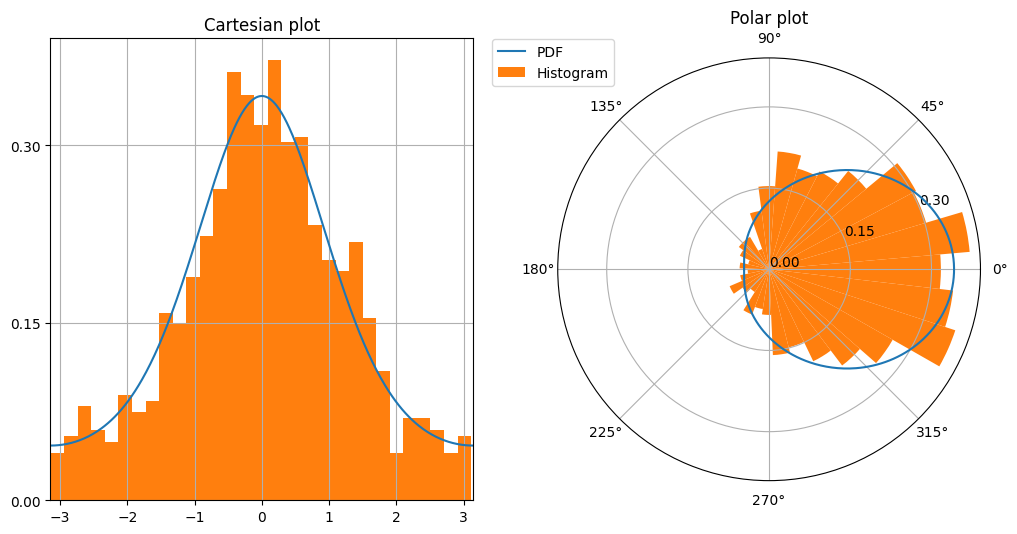

In [127]:
number_of_samples = 1000
samples = vonmises(loc=0, kappa=1).rvs(number_of_samples)

fig = plt.figure(figsize=(12, 6))
left = plt.subplot(121)
right = plt.subplot(122, projection='polar')
x = np.linspace(-np.pi, np.pi, 500)
vonmises_pdf = vonmises.pdf(0, 1, x)
ticks = [0, 0.15, 0.3]

left.plot(x, vonmises_pdf)
left.set_yticks(ticks)
number_of_bins = int(np.sqrt(number_of_samples))
left.hist(samples, density=True, bins=number_of_bins)
left.set_title("Cartesian plot")
left.set_xlim(-np.pi, np.pi)
left.grid(True)

right.plot(x, vonmises_pdf, label="PDF")
right.set_yticks(ticks)
right.hist(samples, density=True, bins=number_of_bins, label="Histogram")
right.set_title("Polar plot")
right.legend(bbox_to_anchor=(0.15, 1.06))

In [152]:
MCIters = 1000
rx = 0.52

for s in range(MCIters) :
    # ind = lexicoroyen(s, T, P)
    # ys = y_arr[ind]
    phi = vonmises(loc=0, kappa=1).rvs(P)
    ys = r * np.exp(1j * phi)
    Y = mp.diag(ys)
    
    f2_arg = Idx + B * mp.inverse(Y)
    f2 = mp.det(f2_arg) ** alpha
    
    f1_arg = mp.inverse((B + mp.inverse(Y))) * D
    f1 = mp.exp(mtrace(f1_arg))
    
    f3 = 1
    for p in range(P):
        # f3 *= Gcal_arr[p, ind[p]]
        f3 *= Gcal(alpha, v * x[p], ys[p])
        
    sum += f1 * f3 / f2
    
    if ((s % 100) == 0) :
        print("Step = {}/{}, sum = {}, f1 = {}, f2 = {}, f3 = {}".format(s, MCIters, sum / (s + 1), f1, f2, f3))
        # print("Step = {}/{}, f3 = {}".format(s, Iters,  f3))
    
print("Step = {}/{}, sum = {}, f1 = {}, f2 = {}, f3 = {}".format(MCIters, MCIters, sum / (s + 1), f1, f2, f3))

Step = 0/1000, sum = (4189.178047248702253965850182419202640329 + 233.5224958038545884493871670555704570797j), f1 = 1.0, f2 = 1.0, f3 = (-49.20477711304292661517992021966361334171 + 233.5224958038545884493871670555704570797j)
Step = 100/1000, sum = (-298.1243268384595560376323376002688213618 + 1092.278381100214695709653763725911726982j), f1 = 1.0, f2 = 1.0, f3 = (2588.344183523992361269743805577639598739 + 6131.339569112018192982708254789561717058j)
Step = 200/1000, sum = (-341.2658287987072284222751829353682750409 + 1257.373196977447538190728013191140167063j), f1 = 1.0, f2 = 1.0, f3 = (-94.69369348270814644594161444788703018681 + 878.6791010046515405541616761943158575081j)
Step = 300/1000, sum = (-434.8834123671736111018073659376778568304 + 1078.167715624760176982194983408022923229j), f1 = 1.0, f2 = 1.0, f3 = (-1830.728663843797421466246879595150106458 + 1444.142115323673907560913318936420647668j)
Step = 400/1000, sum = (-443.6739157328961797024060279176399330791 + 1079.43104643935144